# Assignment

This notebook illustrates the implementation of BIRCH algorithm with examples.

In [2]:
! pip install -r requirements.txt

In [3]:
import pandas as pd

data = pd.read_csv('wine_data.csv')

data.head()

,name,Pinot Noir,Champagne
0,Aerts,24,24
1,Alldredge,21,14
2,Alt,20,12
3,Amsden,24,13
4,Baglivo,23,11


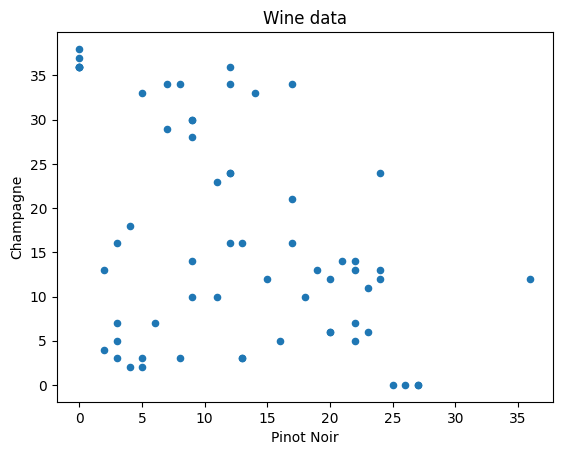

In [4]:
import matplotlib.pyplot as plt

plt.scatter(data.iloc[:, 1], data.iloc[:, 2], s=20)

plt.xlabel(data.columns[1])
plt.ylabel(data.columns[2])
plt.title("Wine data")
plt.show()


In [5]:
features = data.iloc[:, 1:3]

features.head()

,Pinot Noir,Champagne
0,24,24
1,21,14
2,20,12
3,24,13
4,23,11


Now we can implement the algorithm here to cluster the dataset. The dendogram below shows hierarchial clustering for the dataset.

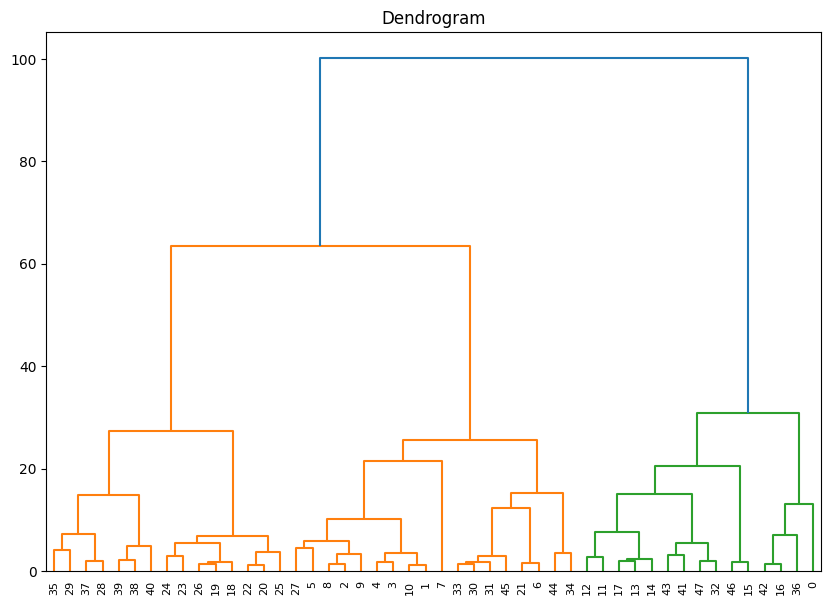

In [6]:
from sklearn.cluster import Birch
from scipy.cluster.hierarchy import dendrogram, linkage

# Assuming 'features' is a DataFrame with 2 columns
features_array = features.values

# Perform BIRCH clustering
birch = Birch(n_clusters=None)
birch.fit(features_array)

# Get the subcluster centers
subcluster_centers = birch.subcluster_centers_

# Perform hierarchical clustering on the subcluster centers
linked = linkage(subcluster_centers, 'ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Dendrogram')
plt.show()

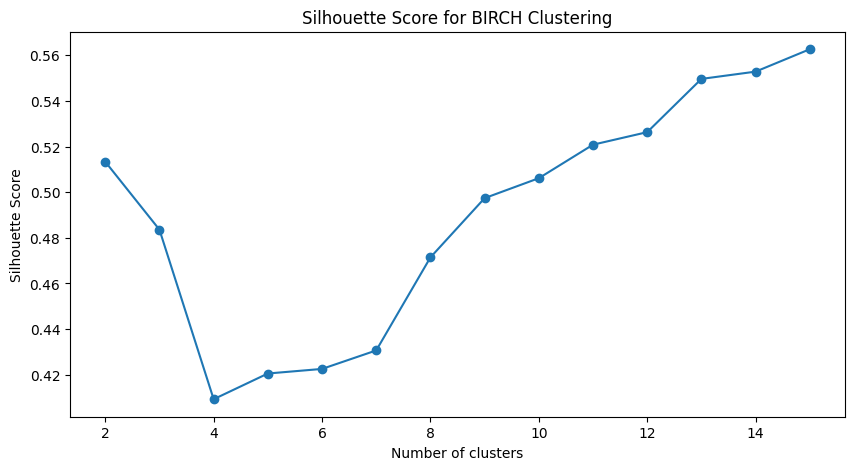

In [7]:
import matplotlib.pyplot as plt
from sklearn.cluster import Birch
from sklearn.metrics import silhouette_score

# Assuming 'features' is a DataFrame with 2 columns
features_array = features.values

range_n_clusters = range(2, 16)
silhouette_scores = []

for n_clusters in range_n_clusters:
    birch = Birch(n_clusters=n_clusters)
    birch.fit(features_array)
    labels = birch.labels_
    silhouette_scores.append(silhouette_score(features_array, labels))

# Plot Silhouette Score
plt.figure(figsize=(10, 5))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title('Silhouette Score for BIRCH Clustering')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

The silhoutte score for different values of n_cluster is shown here. We can see that the score increases as the number of clusters increase, which is understood by the sparse nature of the dataset showing very little possibility of less clusters.